# First Code Snippets for Testing Purposes

This notebook will contain mostly experimental stuff which will later be used for the actual implementation of my KWS model

Install dependencies

In [1]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2025-10-19 16:55:24.288865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/tui/StudienArbeit/source/coffeemachine-automatization/.venv/lib/python3.12/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/tui/StudienArbeit/source/coffeemachine-automatization/.venv/lib/python3.12/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/tui/StudienArbeit/source/coffeemachine-automatization/.venv/lib/python3.12/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/tu

Read out .wav-file

In [ ]:
audio = tfio.audio.AudioIOTensor("../data/testing/file_example_WAV_1MG.wav")
audio      

2025-10-16 12:03:49.070666: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


<AudioIOTensor: shape=[262094      2], dtype=<dtype: 'int16'>, rate=44100>

Different plottings of the audio file

In [4]:
mono_audio_tensor = audio.to_tensor()[:, :-1]
mono_audio_tensor

<tf.Tensor: shape=(262094, 1), dtype=int16, numpy=
array([[ 0],
       [ 0],
       [ 0],
       ...,
       [-2],
       [ 0],
       [ 2]], dtype=int16)>

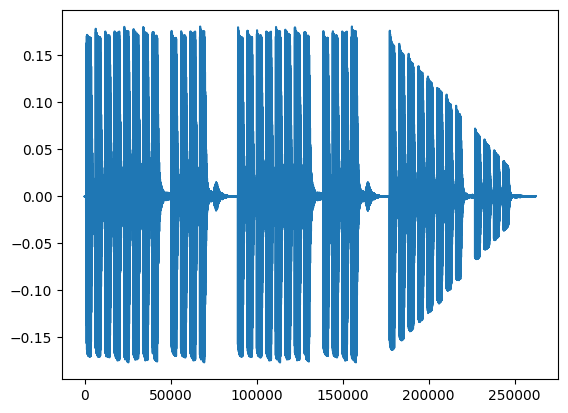

In [8]:
tensor = tf.cast(mono_audio_tensor, tf.float32) / 32768.0
audio_tensor = tf.squeeze(tensor)

plt.figure()
plt.plot(audio_tensor.numpy())

Convert to Spectogram

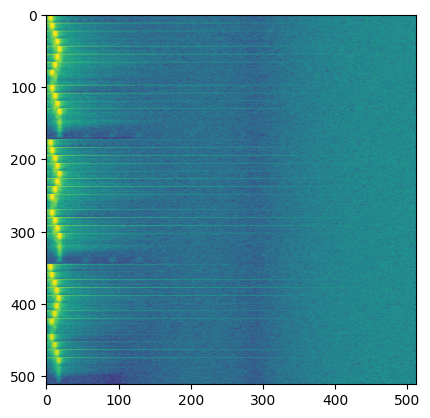

In [10]:
spectrogram = tfio.audio.spectrogram(
    audio_tensor, nfft=1024, window=512, stride=512)

plt.figure()

plt.imshow(tf.math.log(spectrogram).numpy(), )